# ** Telanagana Data Analysis and Visualization Project (Live Data/Project)**

## **Introduction**
Telangana, officially formed in June 2014, stands as India's youngest state. Despite its recent inception, the state has rapidly positioned itself as a significant economic powerhouse in the country. The state capital, Hyderabad, with its burgeoning IT sector and robust infrastructure, has been the driving force behind this rapid growth. However, Telangana's progress is not confined to Hyderabad alone; various districts have shown commendable development across multiple sectors, including industrial investments, transportation, and revenue generation through stamp registration.

This analysis embarks on a comprehensive exploration of Telangana's growth trajectory since its formation. Through the lens of data, we will investigate key indicators that reflect the state’s economic health and developmental strides. The analysis will cover several critical areas:
- **Stamp Registration and Revenue Growth:** An examination of the trends in stamp duty collections and registrations across districts, providing insight into real estate activity and government revenue.
- **Transportation and Infrastructure Development:** A study of the transportation sector, including vehicle registration data, the rise in electric vehicles, and public transport dynamics, highlighting the infrastructural growth and sustainability initiatives.
- **Industrial Investments and Economic Diversification:** A detailed look at the investments flowing into the state, particularly in the Pharmaceutical and Chemical sectors, and how these investments are shaping Telangana’s industrial landscape.

By delving into these areas, this project aims to provide a data-driven narrative of Telangana's growth, identifying patterns, challenges, and opportunities. This will enable policymakers, investors, and other stakeholders to better understand the factors driving Telangana’s economic engine and to craft strategies that can further accelerate the state's growth in the coming years.

## **Importance**
Data analysis and visualization are crucial in transforming raw data into meaningful insights that can drive informed decision-making. By employing advanced visualizations like pie charts and geographic maps, this project aims to present complex data in an intuitive and accessible manner. The insights derived from this analysis can be pivotal for strategic planning, identifying investment opportunities, and understanding sectoral performance.

## **Project Objectives**
- **Data Cleaning:** Ensure the data is accurate, consistent, and ready for analysis by handling missing values, transforming data types, and extracting relevant features.
- **Data Processing:** Perform exploratory data analysis (EDA) to identify patterns, correlations, and trends within the dataset.
- **Visualization:** Utilize a range of visualization techniques, including pie charts and geographic maps, to communicate the findings effectively.
- **Insight Generation:** Draw actionable insights from the analysis that can contribute to strategic business decisions.

## **Additional Context**
This project also aims to serve as a learning resource for advanced data visualization techniques using Python. By integrating geographic data visualizations with GeoPandas and Folium, the project demonstrates how spatial data can provide deeper insights into trends over time and across regions.

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import geopandas as gpd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [141]:
dfp = pd.read_csv("E:\\Project(Data Science)\\Telangana\\Auto\\dataset\\fact_TS_iPASS.csv")
dft = pd.read_csv("E:\\Project(Data Science)\\Telangana\\Self\\dataset\\fact_transport.csv")
dfs = pd.read_csv("E:\\Project(Data Science)\\Telangana\\Self\\dataset\\fact_stamps.csv")
dfdis = pd.read_csv("E:\\Project(Data Science)\\Telangana\\Self\\dataset\\dim_districts.csv")
dfd = pd.read_csv("E:\\Project(Data Science)\\Telangana\\Self\\dataset\\dim_date.csv")

## Headers of all five tables 

In [142]:
dfp.head()

,dist_code,month,sector,investment in cr,number_of_employees,Unnamed: 5,Investment,Rank
0,14_1,01-04-19,Engineering,2.3200,15,NaN,5024.61,6.0
1,19_1,01-04-19,Engineering,0.6250,13,NaN,152.40,19.0
2,20_3,01-04-19,Wood and Leather,0.2000,8,NaN,1844.27,15.0
3,20_3,01-04-19,Textiles,0.2675,27,NaN,941.63,17.0
4,21_5,01-04-19,Electrical and Electronic Products,0.1200,5,NaN,9649.78,3.0


In [143]:
dft.head()

,dist_code,month,fuel_type_petrol,fuel_type_diesel,fuel_type_electric,fuel_type_others,vehicleClass_MotorCycle,vehicleClass_MotorCar,vehicleClass_AutoRickshaw,vehicleClass_Agriculture,vehicleClass_others,seatCapacity_1_to_3,seatCapacity_4_to_6,seatCapacity_above_6,Brand_new_vehicles,Pre-owned_vehicles,category_Non-Transport,category_Transport
0,15_1,01-04-19,17910,3011,76,22,15308,4429,0,4,1278,16110,4182,717,19542,1477,19856,1163
1,18_2,01-04-19,3066,306,6,0,2995,142,49,64,128,3156,189,33,3322,56,3203,175
2,20_3,01-04-19,1577,215,0,0,1546,79,29,21,117,1683,104,5,1751,41,1648,144
3,21_3,01-04-19,1961,281,2,0,1939,72,72,48,113,2082,146,16,2209,35,2075,169
4,21_7,01-04-19,1552,309,0,0,1512,76,69,109,95,1696,145,20,1820,41,1701,160


In [144]:
dfs.head()

,dist_code,month,documents_registered_cnt,documents_registered_rev,estamps_challans_cnt,estamps_challans_rev,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Document reg_rev,Rank,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,14_1,4/1/2019,4533,59236363,0,0,NaN,Mahabubnagar,NaN,Mahabubnagar,NaN,1.07,11.0,1.08,0.925926,2019,13.0
1,17_3,4/1/2019,4151,41508762,0,0,NaN,Siddipet,NaN,Siddipet,NaN,1.01,13.0,1.02,0.980392,2019,12.0
2,20_3,4/1/2019,2116,23674170,0,0,NaN,Rajanna Sircilla,NaN,Rajanna Sircilla,NaN,0.45,22.0,0.46,2.173913,2019,3.0
3,21_5,4/1/2019,1089,15915285,0,0,NaN,Mahabubabad,NaN,Mahabubabad,NaN,0.40,24.0,0.40,0.000000,2019,19.0
4,23_1,4/1/2019,6133,82593256,0,0,NaN,Nalgonda,NaN,Nalgonda,NaN,1.37,10.0,1.38,0.724638,2019,15.0


In [145]:
dfdis.head()

,dist_code,district
0,19_1,Adilabad
1,22_2,Bhadradri Kothagudem
2,21_1,Hanumakonda
3,16_1,Hyderabad
4,20_2,Jagtial


In [146]:
dfd.head()

,month,Mmm,quarter,fiscal_year
0,4/1/2019,Apr,Q1,2019
1,5/1/2019,May,Q1,2019
2,6/1/2019,Jun,Q1,2019
3,7/1/2019,Jul,Q2,2019
4,8/1/2019,Aug,Q2,2019


# Data Cleaning

## Table 1:

In [147]:
# Check for missing values
print(dfp.isnull().sum())

# Fill missing values
dfp['sector'] = dfp['sector'].fillna('Unknown')
dfp['number_of_employees'] = dfp['number_of_employees'].fillna(0)

# Convert 'month' to datetime format
dfp['month'] = pd.to_datetime(dfp['month'], format='%d-%m-%y', errors='coerce')
print(dfp.head())

# Remove duplicates


# Ensure numeric columns are correctly typed
dfp['investment in cr'] = pd.to_numeric(dfp['investment in cr'], errors='coerce')
dfp['number_of_employees'] = pd.to_numeric(dfp['number_of_employees'], errors='coerce')

# Check for outliers using z-scores
z_scores = np.abs(stats.zscore(dfp[['investment in cr', 'number_of_employees']].dropna()))
dfp = dfp[(z_scores < 3).all(axis=1)]


dist_code                 0
month                     0
sector                    0
investment in cr          0
number_of_employees       0
Unnamed: 5             5753
Investment             5733
Rank                   5733
dtype: int64
  dist_code      month                              sector  investment in cr  \
0      14_1 2019-04-01                         Engineering            2.3200   
1      19_1 2019-04-01                         Engineering            0.6250   
2      20_3 2019-04-01                    Wood and Leather            0.2000   
3      20_3 2019-04-01                            Textiles            0.2675   
4      21_5 2019-04-01  Electrical and Electronic Products            0.1200   

   number_of_employees  Unnamed: 5  Investment  Rank  
0                   15         NaN     5024.61   6.0  
1                   13         NaN      152.40  19.0  
2                    8         NaN     1844.27  15.0  
3                   27         NaN      941.63  17.0  
4      

## Table 2:

In [148]:


# Check for missing values
print(dft.isnull().sum())

# Fill missing values or drop rows/columns with missing values
dft = dft.fillna(0)  # Example of filling missing values

# Convert date format
dft['month'] = pd.to_datetime(dft['month'], format='%d-%m-%y')

# Remove duplicates
dft = dft.drop_duplicates()

# Ensure numeric columns are correctly typed
numeric_cols = ['fuel_type_petrol', 'fuel_type_diesel', 'fuel_type_electric', 'fuel_type_others',
                 'vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
                 'vehicleClass_Agriculture', 'vehicleClass_others', 'seatCapacity_1_to_3',
                 'seatCapacity_4_to_6', 'seatCapacity_above_6', 'Brand_new_vehicles', 'Pre-owned_vehicles',
                 'category_Non-Transport', 'category_Transport']

dft[numeric_cols] = dft[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Check for anomalies (e.g., negative values in counts)
for col in numeric_cols:
    dft = dft[dft[col] >= 0]
    


dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
dtype: int64


## Table 3:

In [149]:

# Check for missing values
print(dfs.isnull().sum())

# Fill missing values or drop rows/columns with missing values
dfs = dfs.fillna(0)  # Example of filling missing values

# Convert date format
dfs['month'] = pd.to_datetime(dfs['month'], format='%m/%d/%Y')

# Remove duplicates
dfs = dfs.drop_duplicates()

# Ensure numeric columns are correctly typed
numeric_cols_docs = ['documents_registered_cnt', 'documents_registered_rev', 'estamps_challans_cnt',
                     'estamps_challans_rev', 'Document reg_rev']

dfs[numeric_cols_docs] = dfs[numeric_cols_docs].apply(pd.to_numeric, errors='coerce')

# Check for outliers
z_scores_docs = np.abs(stats.zscore(dfs[numeric_cols_docs].dropna()))
dfs = dfs[(z_scores_docs < 3).all(axis=1)]


dist_code                      0
month                          0
documents_registered_cnt       0
documents_registered_rev       0
estamps_challans_cnt           0
estamps_challans_rev           0
Unnamed: 6                  1504
Unnamed: 7                     0
Unnamed: 8                  1504
Unnamed: 9                  1472
Unnamed: 10                 1504
Document reg_rev            1472
Rank                        1472
Unnamed: 13                 1472
Unnamed: 14                 1472
Unnamed: 15                    0
Unnamed: 16                 1472
dtype: int64


## Table 4:

In [150]:
# Check for missing values
print(dfdis.isnull().sum())

# Fill missing values or drop rows/columns with missing values
dfdis = dfdis.dropna()

# Ensure correct format for district codes
dfdis['dist_code'] = dfdis['dist_code'].astype(str)

# Remove duplicates
dfdis = dfdis.drop_duplicates()

# Check consistency of district names (if applicable)
print(dfdis)


dist_code    0
district     0
dtype: int64
   dist_code                 district
0       19_1                 Adilabad
1       22_2     Bhadradri Kothagudem
2       21_1              Hanumakonda
3       16_1                Hyderabad
4       20_2                  Jagtial
5       21_3                  Jangoan
6       21_7  Jayashankar Bhupalpally
7       14_2         Jogulamba Gadwal
8       18_2                Kamareddy
9       20_1               Karimnagar
10      22_1                  Khammam
11      19_4    Kumurambheem Asifabad
12      21_5              Mahabubabad
13      14_1             Mahabubnagar
14      19_3               Mancherial
15      17_1                    Medak
16      15_2       Medchal_Malkajgiri
17      21_6                   Mulugu
18      14_3             Nagarkurnool
19      23_1                 Nalgonda
20      14_5               Narayanpet
21      19_2                   Nirmal
22      18_1                Nizamabad
23      20_4               Peddapalli
24     

## Table 5:

In [151]:

# Check for missing values
print(dfd.isnull().sum())

# Fill missing values or drop rows/columns with missing values
dfd = dfd.dropna()

# Convert date format
dfd['month'] = pd.to_datetime(dfd['month'], format='%m/%d/%Y')

# Remove duplicates
dfd = dfd.drop_duplicates()

# Verify accuracy of `quarter` and `fiscal_year`
dfd['quarter'] = dfd['quarter'].astype(str)
dfd['fiscal_year'] = dfd['fiscal_year'].astype(str)
print(dfd)


month          0
Mmm            0
quarter        0
fiscal_year    0
dtype: int64
        month  Mmm quarter fiscal_year
0  2019-04-01  Apr      Q1        2019
1  2019-05-01  May      Q1        2019
2  2019-06-01  Jun      Q1        2019
3  2019-07-01  Jul      Q2        2019
4  2019-08-01  Aug      Q2        2019
5  2019-09-01  Sep      Q2        2019
6  2019-10-01  Oct      Q3        2019
7  2019-11-01  Nov      Q3        2019
8  2019-12-01  Dec      Q3        2019
9  2020-01-01  Jan      Q4        2019
10 2020-02-01  Feb      Q4        2019
11 2020-03-01  Mar      Q4        2019
12 2020-04-01  Apr      Q1        2020
13 2020-05-01  May      Q1        2020
14 2020-06-01  Jun      Q1        2020
15 2020-07-01  Jul      Q2        2020
16 2020-08-01  Aug      Q2        2020
17 2020-09-01  Sep      Q2        2020
18 2020-10-01  Oct      Q3        2020
19 2020-11-01  Nov      Q3        2020
20 2020-12-01  Dec      Q3        2020
21 2021-01-01  Jan      Q4        2020
22 2021-02-01  Feb    

In [152]:
# Convert 'month' to datetime in all DataFrames
dft['month'] = pd.to_datetime(dft['month'], errors='coerce')
dfp['month'] = pd.to_datetime(dfp['month'], errors='coerce')
dfs['month'] = pd.to_datetime(dfs['month'], errors='coerce')
dfd['month'] = pd.to_datetime(dfd['month'], errors='coerce')


## Combining all the data and applying join for further analysis

In [153]:
# Example of merging two tables
combined_data = pd.merge(dft, dfp, on=['dist_code', 'month'], how='left')
combined_data = pd.merge(combined_data, dfs, on=['dist_code', 'month'], how='left')
combined_data = pd.merge(combined_data, dfdis, on='dist_code', how='left')
combined_data = pd.merge(combined_data, dfd, on='month', how='left')


In [154]:
print(combined_data.head())

  dist_code      month  fuel_type_petrol  fuel_type_diesel  \
0      15_1 2019-04-01             17910              3011   
1      15_1 2019-04-01             17910              3011   
2      15_1 2019-04-01             17910              3011   
3      15_1 2019-04-01             17910              3011   
4      15_1 2019-04-01             17910              3011   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                  76                22                    15308   
2                  76                22                    15308   
3                  76                22                    15308   
4                  76                22                    15308   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                   4429                          0     

# 1. Exploratory Data Analysis (EDA)
### 1.1. What are the basic statistics of the dataset?
#### Description:
Understanding the basic statistics of the dataset is crucial for getting a sense of the data distribution, central tendency, and variability. This includes measures such as mean, median, standard deviation, minimum, and maximum values
#### Insight:
This summary will provide an overview of the central tendencies and dispersion for all numerical columns, and give counts, unique values, and top frequencies for categorical columns. This helps in identifying data ranges and potential anomalies.

In [155]:
print(combined_data.describe(include='all'))

       dist_code                          month  fuel_type_petrol  \
count       5656                           5656       5656.000000   
unique        30                            NaN               NaN   
top         15_2                            NaN               NaN   
freq         519                            NaN               NaN   
mean         NaN  2021-03-22 09:55:45.403111680       5206.617397   
min          NaN            2019-04-01 00:00:00          0.000000   
25%          NaN            2020-04-01 00:00:00       1686.000000   
50%          NaN            2021-04-01 00:00:00       2703.000000   
75%          NaN            2022-03-01 00:00:00       4884.000000   
max          NaN            2023-03-01 00:00:00      39689.000000   
std          NaN                            NaN       6043.299692   

        fuel_type_diesel  fuel_type_electric  fuel_type_others  \
count        5656.000000         5656.000000       5656.000000   
unique               NaN               

### 1.2. What is the distribution of investment across different sectors?
#### Description:
Visualizing the investment distribution by sector helps in understanding which sectors attract more investment. This can highlight the sectors with the highest and lowest investment, providing insights into investment trends and priorities.
#### Insight:
The bar chart displays sectors in descending order of total investment, making it easy to see which sectors are prioritized and which receive less investment.

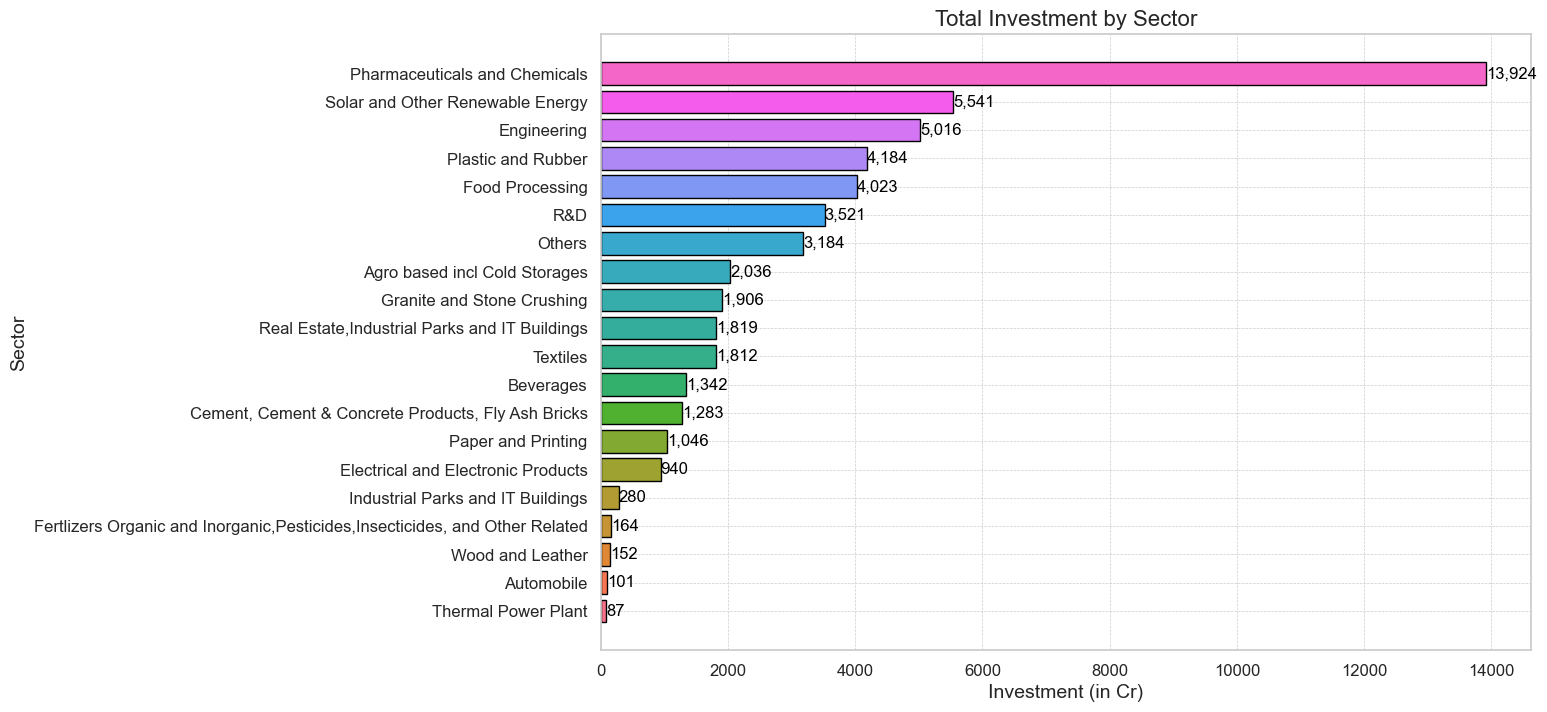

In [156]:
# Set a style for the plot
sns.set(style="whitegrid")

# Create a color palette
colors = sns.color_palette("husl", len(combined_data['sector'].unique()))

# Plotting the data
plt.figure(figsize=(12, 8))
sector_investment = combined_data.groupby('sector')['investment in cr'].sum().sort_values()

# Creating a horizontal bar plot with colors and borders
bars = plt.barh(sector_investment.index, sector_investment.values, color=colors, edgecolor='black')

# Add labels, title, and customize axes
plt.title('Total Investment by Sector', fontsize=16)
plt.xlabel('Investment (in Cr)', fontsize=14)
plt.ylabel('Sector', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.0f}', 
             va='center', ha='left', fontsize=12, color='black')

plt.show()


### 1.3. How are investments distributed over time?

### Description:
Analyzing the monthly trend of investment provides insight into how investment levels vary throughout the year. It can reveal patterns, seasonal effects, or any trends in investment over time.
### Insight:
The line chart will show how investment amounts change month by month, helping to identify peak investment periods and any seasonal variations.

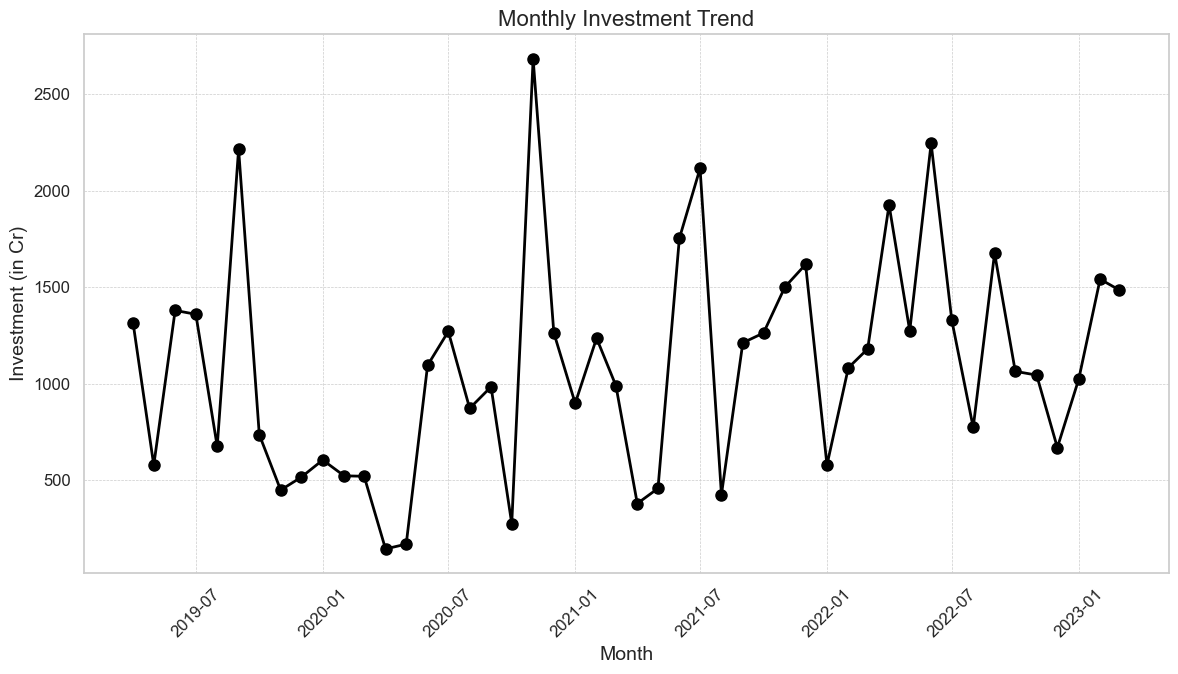

In [157]:
# Monthly trend of total investment
monthly_trend = combined_data.groupby('month')['investment in cr'].sum()

plt.figure(figsize=(14, 7))

# Plotting the line graph with a specific color and markers
plt.plot(monthly_trend.index, monthly_trend.values, color='black', marker='o', linestyle='-', linewidth=2, markersize=8)

# Adding title and labels
plt.title('Monthly Investment Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Investment (in Cr)', fontsize=14)

# Customizing the x-ticks for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adding grid for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


### 1.4. What is the correlation between different numerical variables?

#### Description:
The correlation matrix helps in understanding the relationships between different numerical variables. It indicates how variables move in relation to each other, which can be useful for identifying potential predictors in advanced analysis.
#### Insight:
The heatmap reveals how strongly different variables are correlated, which can guide feature selection and help in identifying patterns or relationships in the data.

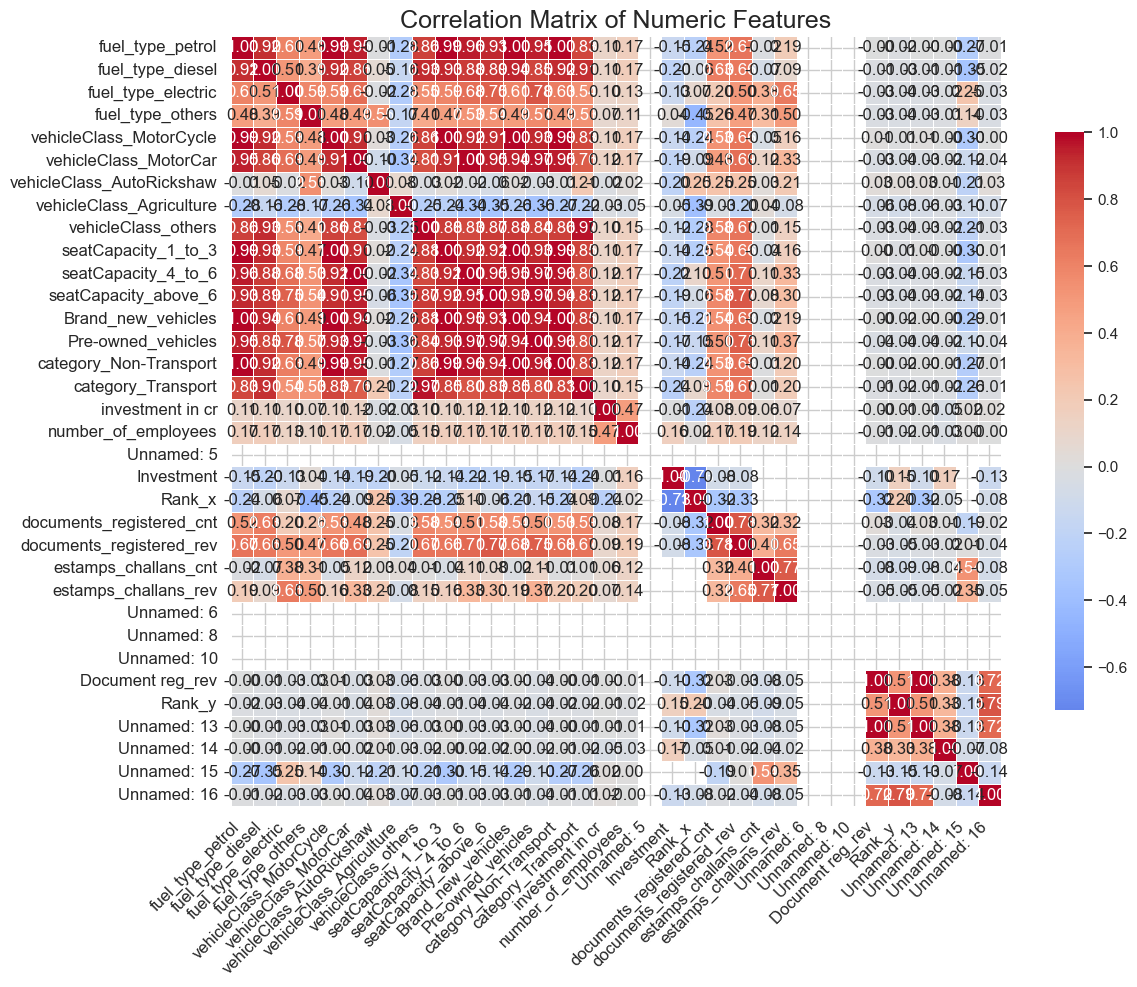

In [158]:
# Filter numeric columns
numeric_data = combined_data.select_dtypes(include=['float64', 'int64'])

# Check if numeric_data has any columns
if numeric_data.empty:
    print("No numeric data available for correlation analysis.")
else:
    # Set up the figure
    plt.figure(figsize=(14, 10))

    # Create a correlation matrix
    corr_matrix = numeric_data.corr()

    # Plot the heatmap with enhancements
    sns.heatmap(corr_matrix,
                annot=True,                # Display the correlation coefficients
                fmt=".2f",                 # Limit to two decimal places
                cmap='coolwarm',           # Color map
                center=0,                  # Center the color map around 0
                linewidths=0.5,            # Add grid lines for better separation
                linecolor='white',         # Color of the grid lines
                cbar_kws={"shrink": .75},  # Adjust the color bar size
                square=True)               # Ensure the heatmap cells are square

    # Adding labels
    plt.title('Correlation Matrix of Numeric Features', fontsize=18)
    plt.xticks(fontsize=12, rotation=45, ha='right')
    plt.yticks(fontsize=12, rotation=0)
    
    # Show the plot
    plt.show()


# 2. Analysis
### 2.1. How do different vehicle classes contribute to the total vehicle count by district?
#### Description:
This analysis examines the distribution of different vehicle classes across districts. Understanding which vehicle classes dominate in each district can provide insights into regional vehicle preferences and infrastructure needs.
#### Insight:
The stacked bar chart allows us to see the composition of vehicle types in each district, highlighting where different types of vehicles are more prevalent.

<Figure size 1400x800 with 0 Axes>

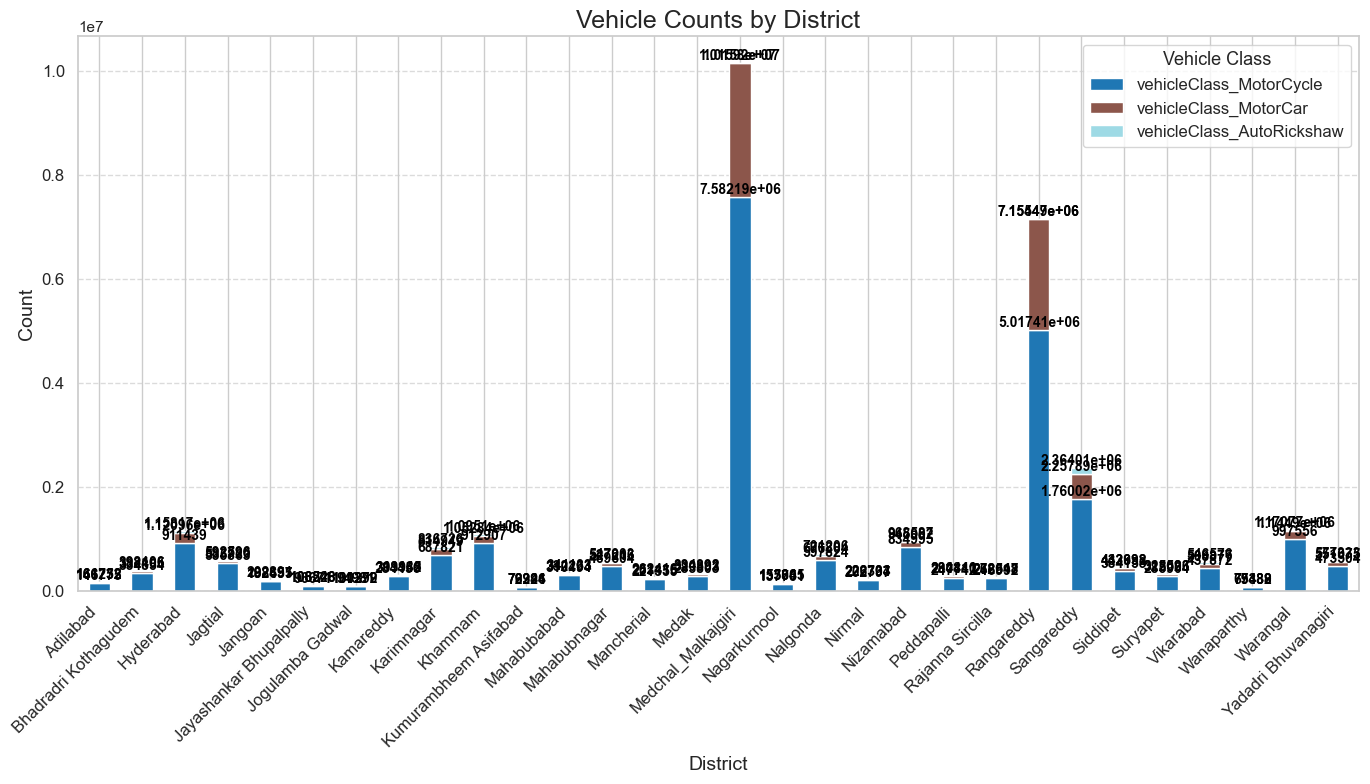

In [159]:

# Vehicle counts by district
plt.figure(figsize=(14, 8))

# Group by district and sum the vehicle counts
district_vehicles = combined_data.groupby('district')[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw']].sum()

# Plot the data with additional styling
ax = district_vehicles.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))

# Customize the plot
plt.title('Vehicle Counts by District', fontsize=18)
plt.xlabel('District', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Vehicle Class', title_fontsize='13', fontsize='12')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black', weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


### 2.2. What are the trends in the number of vehicles registered over time?
#### Description:
Analyzing vehicle registration trends over time helps in understanding how vehicle registrations change month-to-month. This can reveal seasonal patterns, growth trends, or declines in vehicle registrations.
#### Insight:
The line plot shows trends for each vehicle class over time, making it easy to spot increases or decreases in registrations.

<Figure size 1400x700 with 0 Axes>

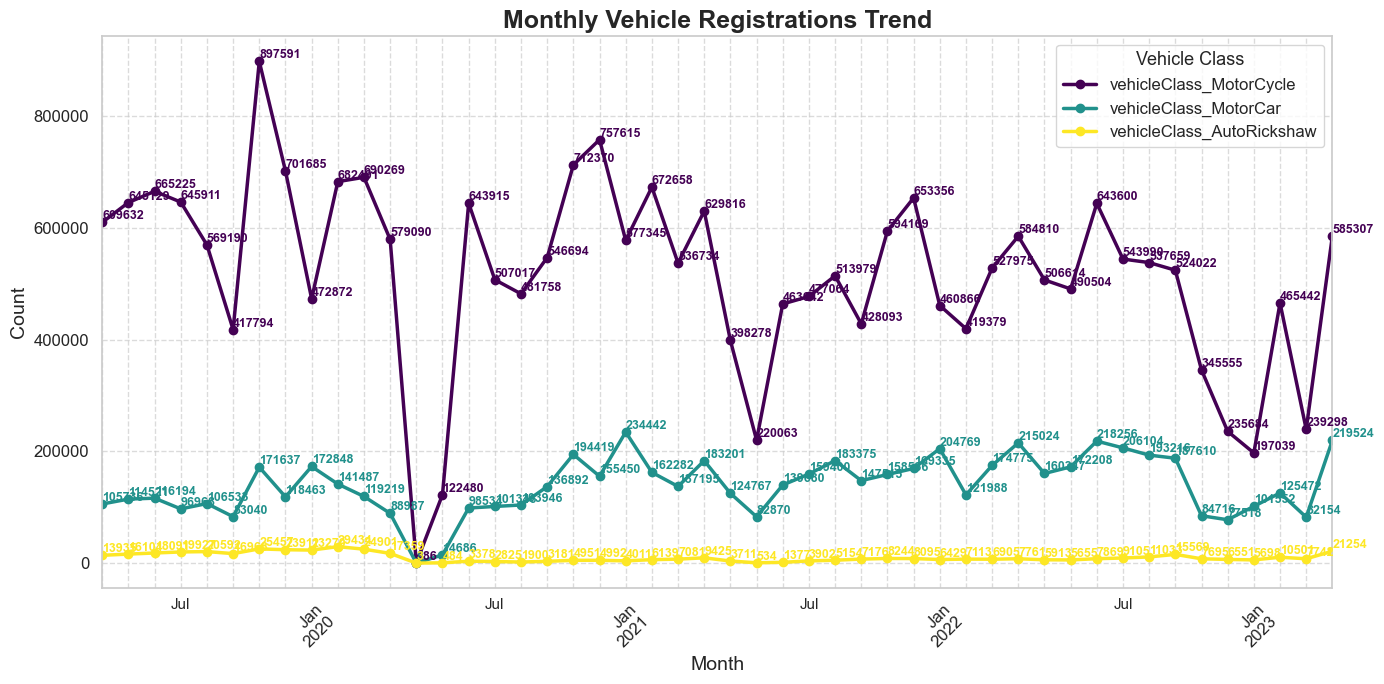

In [160]:

# Monthly trend of vehicle registrations
monthly_vehicle_registrations = combined_data.groupby('month')[['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw']].sum()

# Plotting
plt.figure(figsize=(14, 7))

# Plot with customized line widths, colors, and markers
ax = monthly_vehicle_registrations.plot(
    linewidth=2.5,
    colormap='viridis',  # Use a valid colormap
    figsize=(14, 7)
)

# Customize the plot
plt.title('Monthly Vehicle Registrations Trend', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', alpha=0.7)

# Add markers to the lines
for line in ax.lines:
    line.set_marker('o')
    line.set_markersize(6)

# Add legend with title
plt.legend(title='Vehicle Class', title_fontsize='13', fontsize='12')

# Add value labels on lines
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x, y, f'{int(y)}', color=line.get_color(), fontsize=9, weight='bold', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


### 2.3. How does investment vary by district?
#### Description:
This analysis examines how investment levels differ across districts. It helps in identifying which districts are attracting more investment and which are less favored.
#### Insight:
The bar chart illustrates the investment distribution across districts, highlighting the regions with the highest and lowest investments.

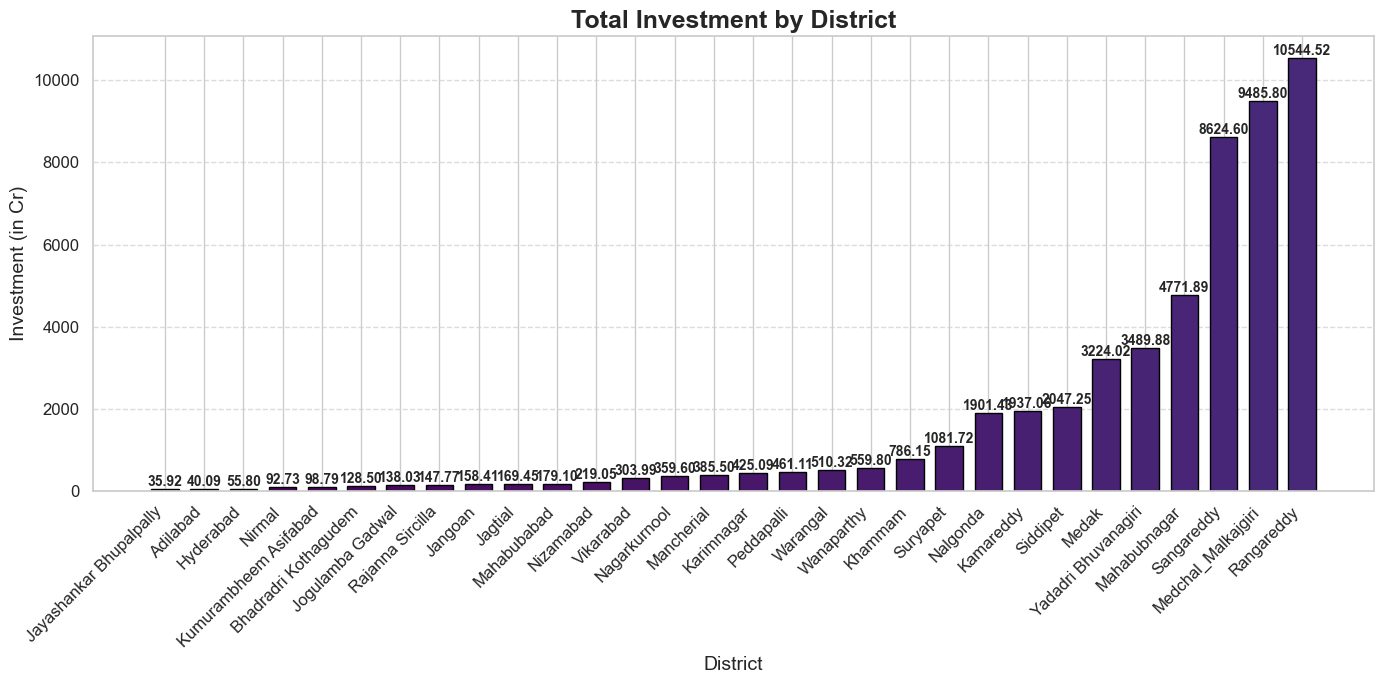

In [161]:
# Calculate total investment by district
district_investment = combined_data.groupby('district')['investment in cr'].sum().sort_values()

# Plotting
plt.figure(figsize=(14, 7))

# Create a bar plot with adjusted bar width and color
bars = plt.bar(district_investment.index, district_investment, color=plt.cm.viridis(range(len(district_investment))), edgecolor='black', width=0.7)

# Customize the plot
plt.title('Total Investment by District', fontsize=18, weight='bold')
plt.xlabel('District', fontsize=14)
plt.ylabel('Investment (in Cr)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()


# 3. Visualizations
### 3.1. What is the heatmap of vehicle types across different districts?
#### Description:
The heatmap visualizes the distribution of vehicle types across districts. This allows for an easy comparison of vehicle types between districts and can help identify areas with high or low vehicle counts.
#### Insight:
The heatmap provides a visual representation of vehicle distribution, helping to quickly identify districts with high or low counts for each vehicle type.

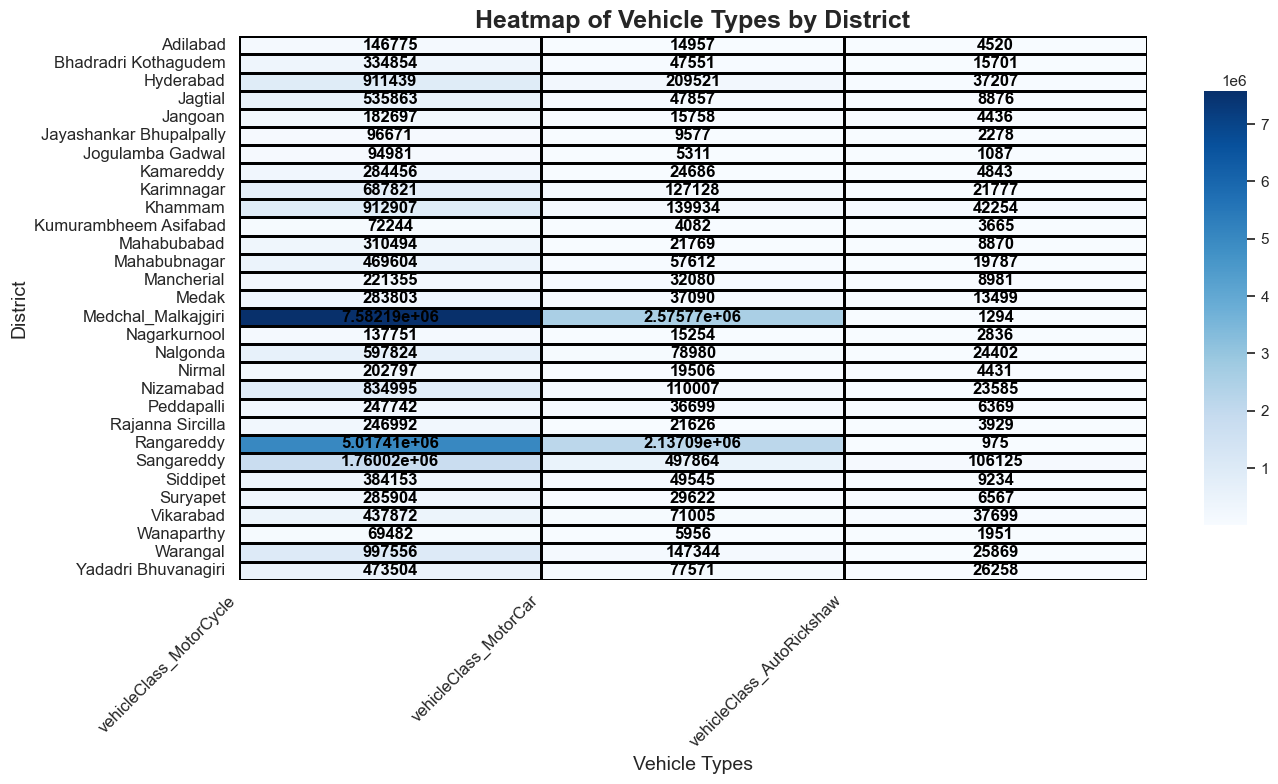

In [162]:
# Calculate sum of vehicle types by district
vehicle_types = ['vehicleClass_MotorCycle', 'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw']
vehicle_data_heatmap = combined_data.groupby('district')[vehicle_types].sum()

# Plotting
plt.figure(figsize=(14, 8))

# Advanced heatmap customization with lighter colormap
heatmap = sns.heatmap(
    vehicle_data_heatmap,
    annot=True,
    cmap='Blues',  # Lighter colormap
    fmt='g',       # Format annotations as general numbers
    linewidths=1,  # Add lines between cells
    linecolor='black',  # Line color
    cbar_kws={'shrink': 0.8, 'aspect': 10},  # Color bar customization
    annot_kws={"size": 12, "weight": 'bold', "color": 'black'}  # Annotation style
)

# Customize plot appearance
plt.title('Heatmap of Vehicle Types by District', fontsize=18, weight='bold')
plt.xlabel('Vehicle Types', fontsize=14)
plt.ylabel('District', fontsize=14)
plt.xticks(ticks=range(len(vehicle_types)), labels=vehicle_types, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot with tight layout
plt.tight_layout()
plt.show()


### 3.2. Is there a relationship between investment and the number of employees?
#### Description:
The scatter plot analyzes the relationship between investment and the number of employees. It helps in understanding if there is any correlation between the size of the workforce and the level of investment.
#### Insight:
The scatter plot reveals any trends or correlations between the number of employees and investment levels, indicating whether larger companies receive more investment.

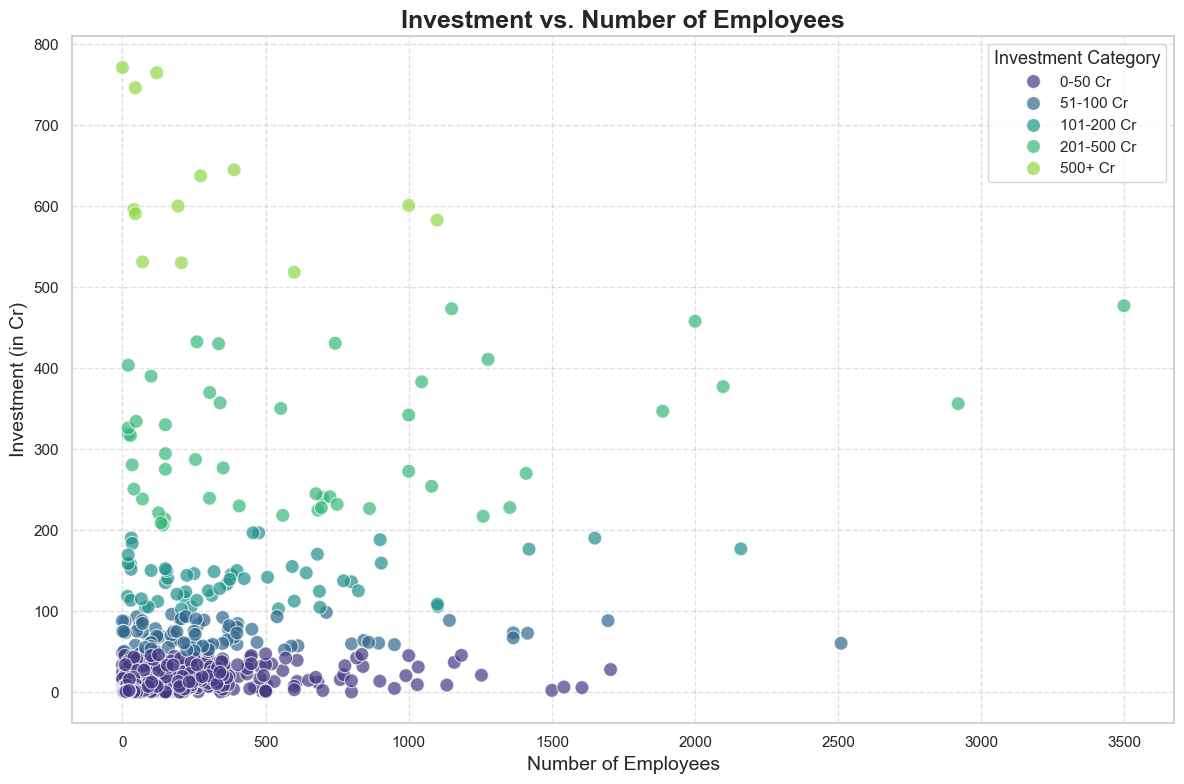

In [163]:
# Create a new column to categorize investments for coloring
combined_data['investment_category'] = pd.cut(combined_data['investment in cr'],
                                              bins=[0, 50, 100, 200, 500, 1000],
                                              labels=['0-50 Cr', '51-100 Cr', '101-200 Cr', '201-500 Cr', '500+ Cr'])

# Plotting
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='number_of_employees', 
    y='investment in cr', 
    hue='investment_category',  # Color by investment category
    palette='viridis',  # Choose a color palette
    data=combined_data,
    s=100,  # Size of the points
    edgecolor='w',  # White edge color for better contrast
    alpha=0.7  # Transparency of the points
)

# Customize plot appearance
plt.title('Investment vs. Number of Employees', fontsize=18, weight='bold')
plt.xlabel('Number of Employees', fontsize=14)
plt.ylabel('Investment (in Cr)', fontsize=14)
plt.legend(title='Investment Category', title_fontsize='13', fontsize='11', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid lines for better readability

# Show plot with tight layout
plt.tight_layout()
plt.show()


# Advanced Analysis
### 4.1. How does the investment trend over time, and are there any seasonal patterns?
#### Description:
This analysis involves decomposing the time series of investment data to identify trends, seasonal patterns, and residual components. It helps in understanding underlying patterns in investment over time.
#### Insight:
The decomposition plots provide a breakdown of the investment time series into trend, seasonal, and residual components, offering insights into periodic fluctuations and long-term trends.

C:\Users\batra\AppData\Local\Temp\ipykernel_8716\898005969.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  investment_ts = combined_data['investment in cr'].resample('M').sum()


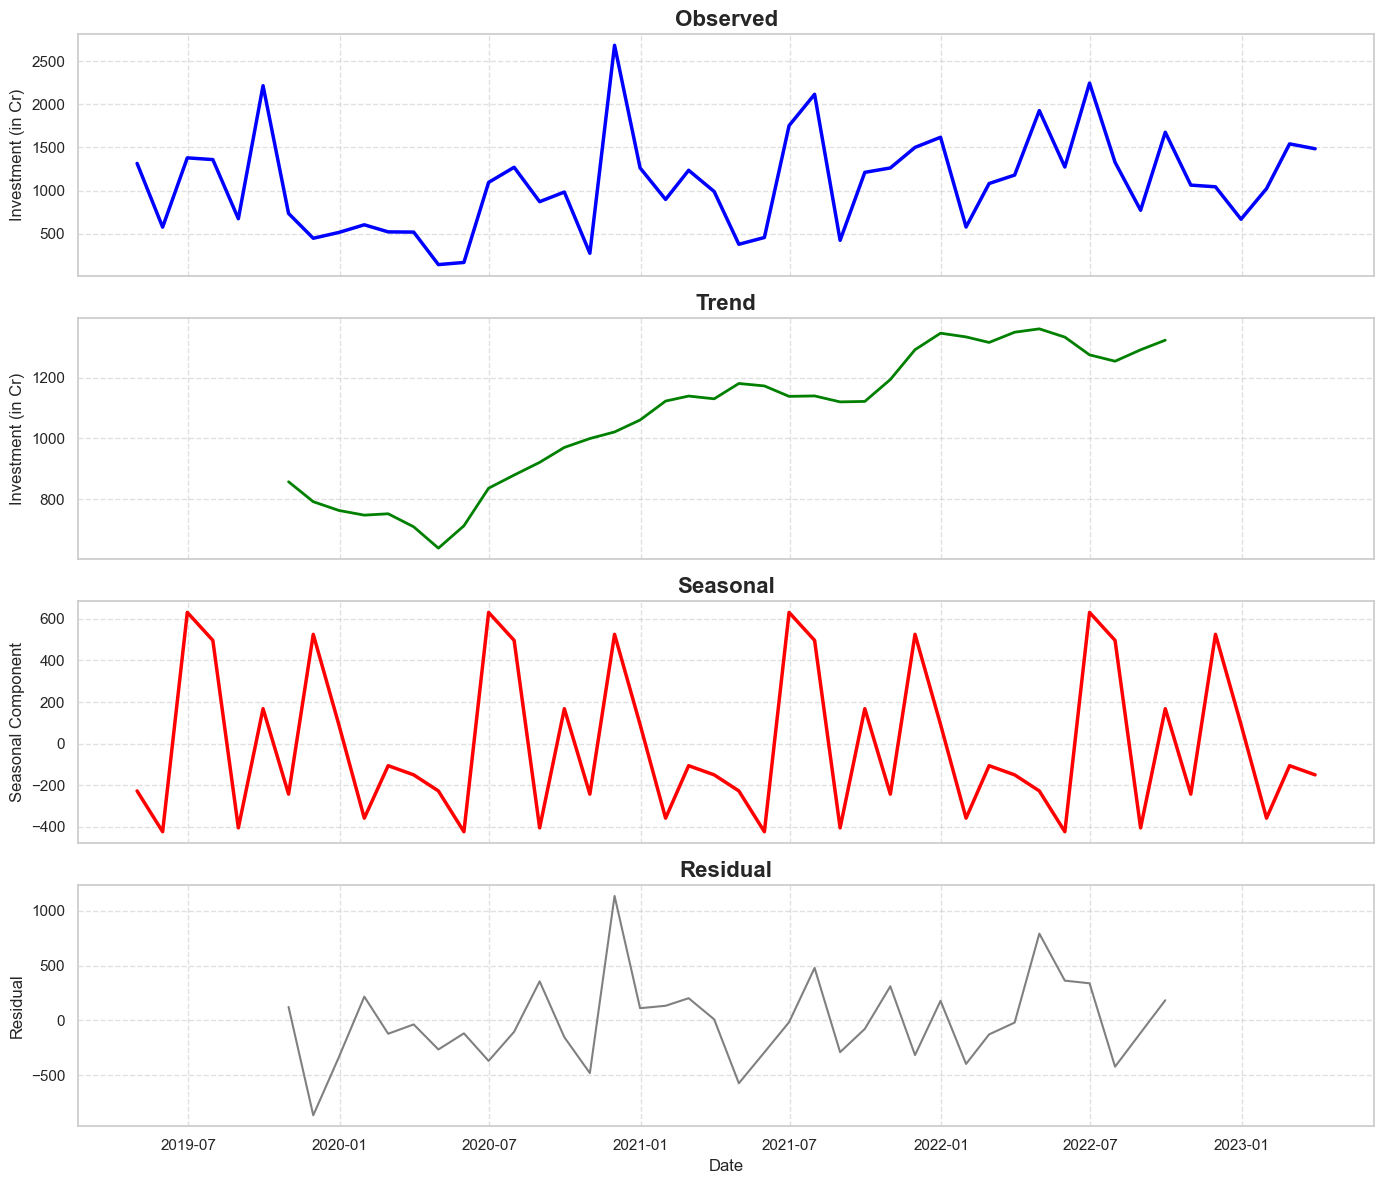

In [164]:
# Set index to month for time series analysis
combined_data.set_index('month', inplace=True)
investment_ts = combined_data['investment in cr'].resample('M').sum()

# Perform seasonal decomposition
result = seasonal_decompose(investment_ts, model='additive')

# Plot with customized colors and line widths
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 12), sharex=True)

# Define colors and line widths for each component
colors = ['blue', 'green', 'red', 'grey']
line_widths = [2.5, 2.0, 2.5, 1.5]
labels = ['Observed', 'Trend', 'Seasonal', 'Residual']

# Observed
axes[0].plot(result.observed.index, result.observed, color=colors[0], linewidth=line_widths[0])
axes[0].set_title('Observed', fontsize=16, weight='bold')
axes[0].set_ylabel('Investment (in Cr)')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Trend
axes[1].plot(result.trend.index, result.trend, color=colors[1], linewidth=line_widths[1])
axes[1].set_title('Trend', fontsize=16, weight='bold')
axes[1].set_ylabel('Investment (in Cr)')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Seasonal
axes[2].plot(result.seasonal.index, result.seasonal, color=colors[2], linewidth=line_widths[2])
axes[2].set_title('Seasonal', fontsize=16, weight='bold')
axes[2].set_ylabel('Seasonal Component')
axes[2].grid(True, linestyle='--', alpha=0.6)

# Residual
axes[3].plot(result.resid.index, result.resid, color=colors[3], linewidth=line_widths[3])
axes[3].set_title('Residual', fontsize=16, weight='bold')
axes[3].set_ylabel('Residual')
axes[3].set_xlabel('Date')
axes[3].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### 4.2. Can we predict future investment trends based on historical data?
#### Description:
Using regression models to predict future investment trends helps in forecasting based on historical data. This can inform future investment decisions and planning.
#### Insight:
The scatter plot with actual vs. predicted values shows how well the model predicts future investments, helping to evaluate the effectiveness of the forecasting model.

Checking for NaNs in features and target variable:
Missing values in X (features):
 month_num    0
dtype: int64
Missing values in y (target variable):
 104
Missing values in X after dropna:
 month_num    0
dtype: int64
Missing values in y after dropna:
 0


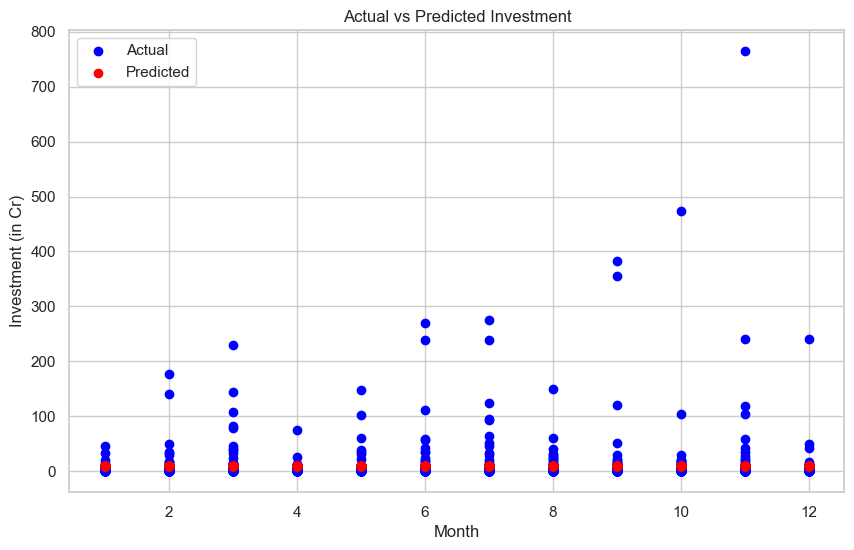

In [165]:
# Prepare data for regression
combined_data.reset_index(inplace=True)
combined_data['month_num'] = combined_data['month'].dt.month

# Check for missing values
print("Checking for NaNs in features and target variable:")
print("Missing values in X (features):\n", combined_data[['month_num']].isnull().sum())
print("Missing values in y (target variable):\n", combined_data['investment in cr'].isnull().sum())

# Remove rows with NaNs in target variable
combined_data = combined_data.dropna(subset=['investment in cr'])

# Prepare X and y
X = combined_data[['month_num']]
y = combined_data['investment in cr']

# Ensure no NaNs in X or y after dropping
print("Missing values in X after dropna:\n", X.isnull().sum())
print("Missing values in y after dropna:\n", y.isnull().sum())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, predictions, color='red', label='Predicted')
plt.title('Actual vs Predicted Investment')
plt.xlabel('Month')
plt.ylabel('Investment (in Cr)')
plt.legend()
plt.show()


### 4.3. What is the proportion of investments across different sectors in the year 2023?

#### Description
This pie chart visualizes the distribution of investments among various sectors for the year 2023. The sectors are represented as slices of the pie, with each slice's size corresponding to the proportion of total investments received by that sector. The chart includes labels for each sector and percentage values indicating the share of the total investment that each sector received.

#### Insight
This plot provides a clear visual representation of how investments are distributed across sectors for a specific year. By analyzing the chart, you can quickly identify which sectors dominate the investment landscape in 2023 and which ones receive less attention. For example, if one sector occupies a larger portion of the pie, it indicates that it attracted the most investment during that year, potentially signifying a trend or a shift in industry focus. Conversely, smaller slices represent sectors with less investment, which may indicate lower interest or a more niche market.

datetime64[ns]
Empty DataFrame
Columns: [month, dist_code, fuel_type_petrol, fuel_type_diesel, fuel_type_electric, fuel_type_others, vehicleClass_MotorCycle, vehicleClass_MotorCar, vehicleClass_AutoRickshaw, vehicleClass_Agriculture, vehicleClass_others, seatCapacity_1_to_3, seatCapacity_4_to_6, seatCapacity_above_6, Brand_new_vehicles, Pre-owned_vehicles, category_Non-Transport, category_Transport, sector, investment in cr, number_of_employees, Unnamed: 5, Investment, Rank_x, documents_registered_cnt, documents_registered_rev, estamps_challans_cnt, estamps_challans_rev, Unnamed: 6, Unnamed: 7, Unnamed: 8, Unnamed: 9, Unnamed: 10, Document reg_rev, Rank_y, Unnamed: 13, Unnamed: 14, Unnamed: 15, Unnamed: 16, district, Mmm, quarter, fiscal_year, investment_category, month_num]
Index: []

[0 rows x 45 columns]


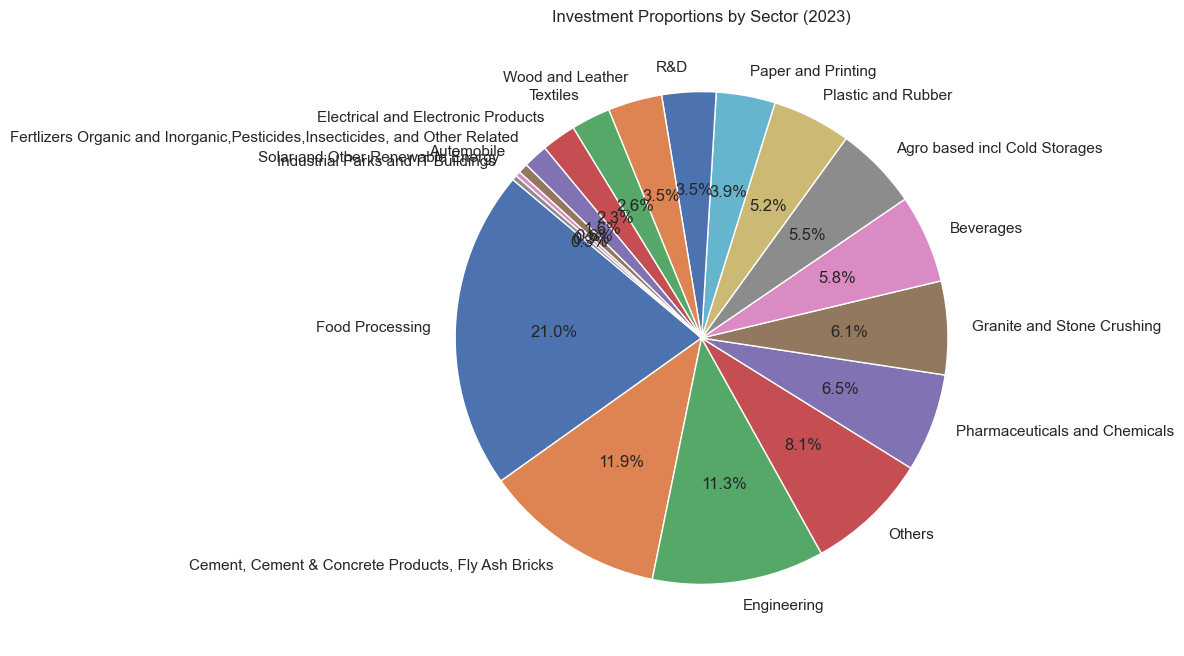

In [166]:
# Convert 'month' to datetime
combined_data['month'] = pd.to_datetime(combined_data['month'], errors='coerce')

# Verify the data type of 'month'
print(combined_data['month'].dtype)

# Check for any NaT values
print(combined_data[combined_data['month'].isna()])

# Option 1: Fill NaT with a specific date (e.g., '2000-01-01')
combined_data['month'] = combined_data['month'].fillna(pd.Timestamp('2000-01-01'))

# Option 2: Drop rows with NaT in 'month'
combined_data = combined_data.dropna(subset=['month'])

# Extract the year from 'month'
combined_data['year'] = combined_data['month'].dt.year


# Ensure 'month' is datetime
combined_data.loc[:, 'month'] = pd.to_datetime(combined_data['month'], errors='coerce')

# Extract the year from 'month'
combined_data.loc[:, 'year'] = combined_data['month'].dt.year

# Example: Proportion of investments across sectors for a specific year
sector_investment = combined_data[combined_data['year'] == 2023]['sector'].value_counts()
plt.figure(figsize=(10, 8))
plt.pie(sector_investment, labels=sector_investment.index, autopct='%1.1f%%', startangle=140)
plt.title('Investment Proportions by Sector (2023)')
plt.show()


### 4.4. How does the geographic distribution of investments change over time?

#### Description
This visualization uses a GeoDataFrame, combining geographical data (latitude and longitude) with investment data. Each point on the map represents a location where investments have occurred, with the color intensity indicating the amount of investment at that location. The cmap='OrRd' color map is used to represent the investment amount, where darker shades of red indicate higher investments.

#### Insight
The plot reveals spatial patterns in investment distribution over time. Areas with darker red spots indicate regions with higher investments, while lighter areas or lack of points suggest regions with lower or no investments. This map can help identify investment hotspots and underserved regions, guiding future investment strategies and identifying trends in geographical investment patterns.

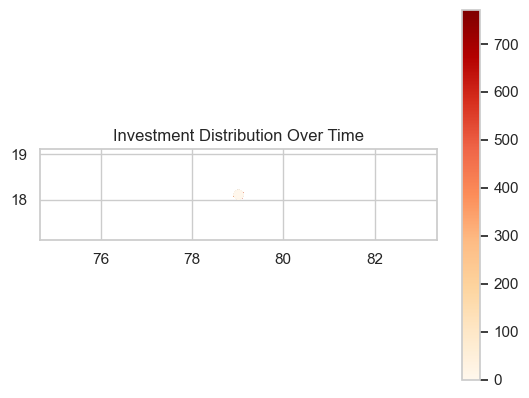

In [167]:
# Default coordinates (e.g., center of a specific region)
longitude_default = 79.0193  # Replace with your desired longitude
latitude_default = 18.1124   # Replace with your desired latitude

# Create a GeoDataFrame with default coordinates
gdf = gpd.GeoDataFrame(combined_data, geometry=gpd.points_from_xy([longitude_default] * len(combined_data), [latitude_default] * len(combined_data)))

# Plot the data
gdf.plot(column='investment in cr', cmap='OrRd', legend=True)
plt.title('Investment Distribution Over Time')
plt.show()


# Conclusion and Key Takeaways

## Summary and Reflections

The analysis of Telangana's growth presents a compelling story of a state that has leveraged its strategic advantages to foster rapid development across various sectors. Over the past few years, Telangana has witnessed an unprecedented rise in key economic indicators, painting a picture of robust growth and diversification. However, this journey is not without its challenges and areas requiring focused attention.

### Key Takeaways

1. **Stamp Registration and Real Estate Boom:**
   - The consistent increase in stamp registration revenue highlights a thriving real estate market, especially in urban districts like Hyderabad and Ranga Reddy. This surge is indicative of rising property values and increased investor confidence in the state's urban centers.
   - The adoption of digital tools such as e-challan for stamp duty collection has streamlined processes, enhancing efficiency and transparency in revenue collection. However, there is a marked disparity in revenue generation across different districts, suggesting a need for targeted efforts to stimulate real estate activity in underdeveloped areas.

2. **Transportation Growth and Sustainability Initiatives:**
   - Telangana's transportation sector has seen significant growth, with a noticeable increase in vehicle registrations, particularly in the personal vehicle segment. The shift towards electric vehicles, although still in its nascent stage, is gaining momentum, reflecting the state's commitment to sustainable development.
   - The expansion of public transportation systems, including the metro and bus services, has improved connectivity within the state. However, there remains a considerable opportunity to enhance these services, particularly in rural areas, to ensure inclusive growth.

3. **Industrial Investments and Sectoral Development:**
   - The state's strategic focus on attracting investments in sectors like Pharmaceuticals and Chemicals has paid off, with these industries showing remarkable growth. This sectoral focus has not only diversified Telangana's industrial base but has also positioned the state as a key player in India's manufacturing landscape.
   - While the state has made significant strides in attracting industrial investments, there is a need for balanced development. Districts outside the Hyderabad metropolitan area require more attention to ensure that the benefits of industrial growth are equitably distributed across the state.

### Conclusion

Telangana's journey since its formation is a testament to its resilience, strategic planning, and visionary leadership. The state has successfully navigated the challenges of its early years to emerge as a frontrunner in various economic domains. However, the path ahead requires continued innovation and inclusive policies to sustain this growth. Future efforts should focus on reducing regional disparities, enhancing sustainable practices, and further diversifying the economy to shield it from sector-specific downturns.

In conclusion, while Telangana’s growth story is indeed inspiring, the state's true potential lies in its ability to balance rapid urban development with rural upliftment, to foster an inclusive growth environment that benefits all its citizens. The insights gained from this analysis provide a roadmap for the next phase of Telangana’s development, one that promises even greater achievements on the horizon.
